In [1]:
!pip install pandas matplotlib seaborn openpyxl yfinance statsmodels prophet

        Date      Open      High       Low     Close  Volume
0 1962-01-02  1.530517  1.530517  1.513320  1.513320  407940
1 1962-01-03  1.513322  1.526550  1.513322  1.526550  305955
2 1962-01-04  1.526549  1.526549  1.510675  1.511336  274575
3 1962-01-05  1.509352  1.509352  1.478927  1.481573  384405
4 1962-01-08  1.480249  1.480249  1.441887  1.453792  572685


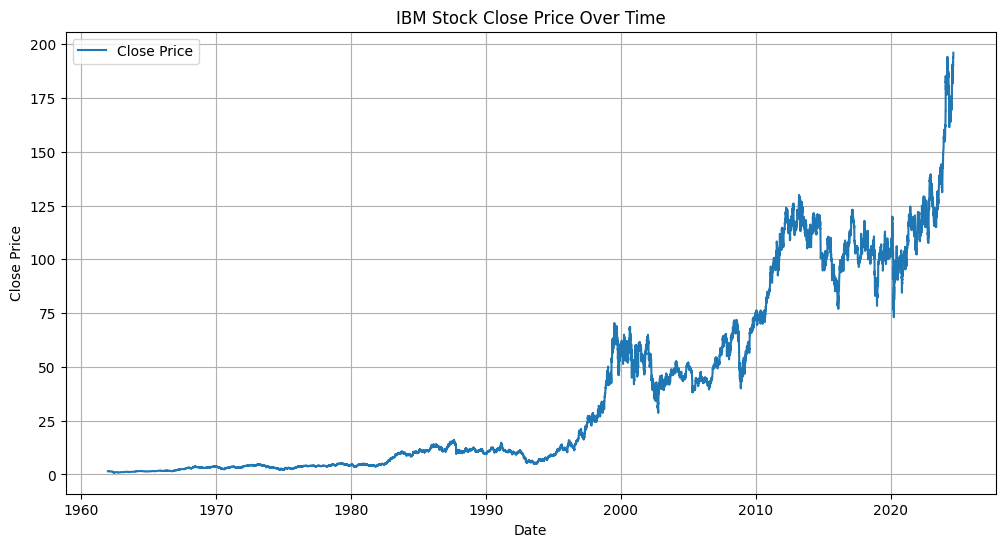

In [2]:
# Step 1: Install required packages if not already installed
# !pip install pandas matplotlib seaborn openpyxl yfinance statsmodels prophet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Excel file
df = pd.read_excel("IBM.csv.xlsx")  # Ensure this file is in the working directory

# Display first few rows
print(df.head())

# Convert 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as index for time series
df.set_index('Date', inplace=True)

# Sort the data by date
df = df.sort_index()

# Plot Close prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('IBM Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


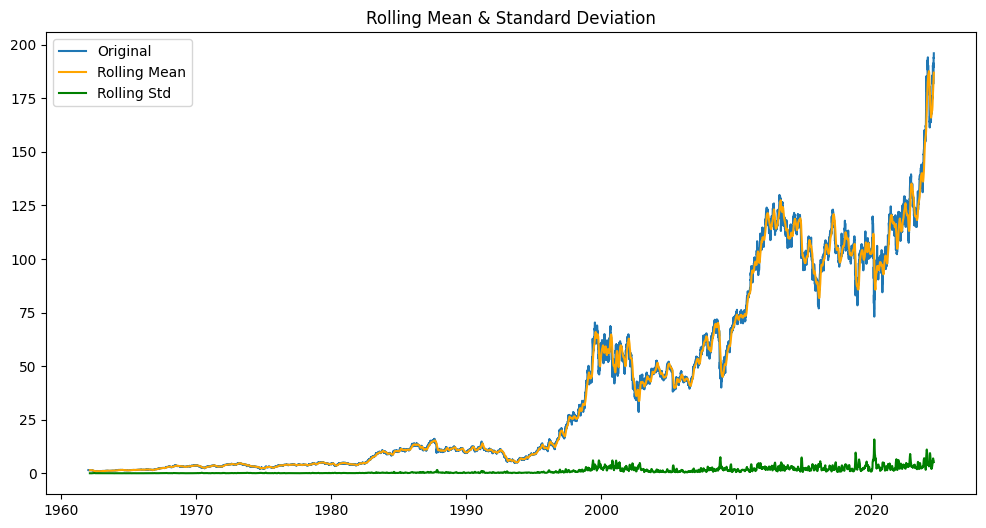

ADF Statistic: 1.6814816746289205
p-value: 0.9980825560561151
❌ The series is NOT stationary.


In [3]:
from statsmodels.tsa.stattools import adfuller

# Function to perform Dickey-Fuller test
def check_stationarity(series):
    result = adfuller(series.dropna())
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] < 0.05:
        print("✅ The series is stationary.")
    else:
        print("❌ The series is NOT stationary.")

# Plot rolling mean and standard deviation
rolmean = df['Close'].rolling(window=30).mean()
rolstd = df['Close'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Original')
plt.plot(rolmean, label='Rolling Mean', color='orange')
plt.plot(rolstd, label='Rolling Std', color='green')
plt.title('Rolling Mean & Standard Deviation')
plt.legend()
plt.show()

# ADF Test
check_stationarity(df['Close'])


In [4]:
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
import numpy as np


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=39997.018, Time=41.94 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=39996.995, Time=4.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=39991.412, Time=2.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=39991.473, Time=2.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=39998.238, Time=0.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=39993.169, Time=2.85 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=39993.085, Time=3.80 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=23.62 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0]             : AIC=39992.798, Time=0.95 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 82.575 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                15766
Model:               SARIMAX(1, 1, 0)   Log Likelihood              -19992.706
Date:                Wed, 23 Jul 2025   AIC                          39991.412
Time:                        06:07:25   BIC                          40014.408
Sample:                             0   HQIC                         39999.023
                              - 15766                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0126      0.007      1.828      0.068      -0.00

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                15766
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -19994.399
Date:                Wed, 23 Jul 2025   AIC                          39992.798
Time:                        06:07:27   BIC                          40008.129
Sample:                             0   HQIC                         39997.872
                              - 15766                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0217      0.004     -6.034      0.000      -0.029      -0.015
sigma2         0.7398      0.002    383.644      0.000       0.736       0.744
Ljung-Box (L1) (Q):                   0.00   Jarque-

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


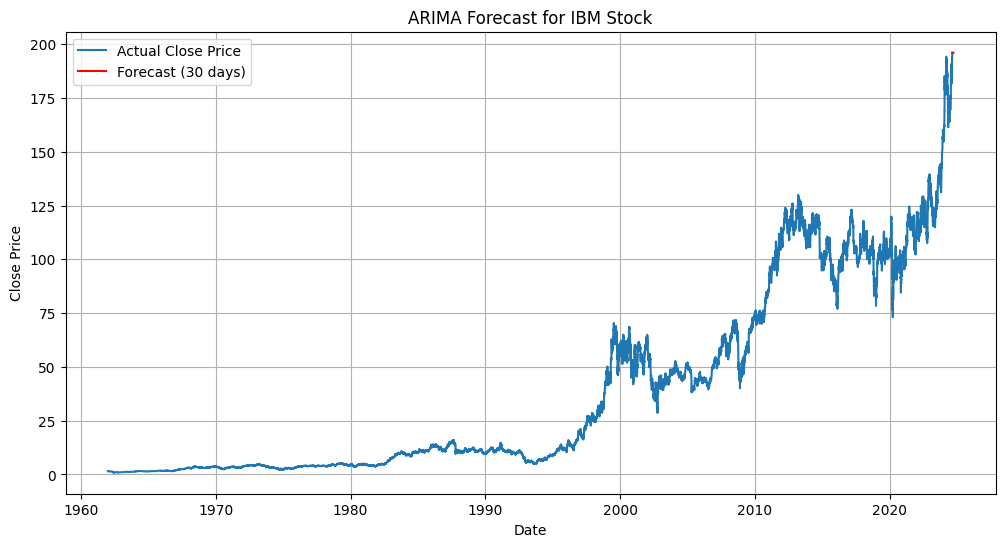

In [5]:
# Install if needed:
# !pip install pmdarima

import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Fit auto ARIMA model to find best p,d,q
auto_model = pm.auto_arima(df['Close'], seasonal=False, stepwise=True, trace=True, suppress_warnings=True)
print(auto_model.summary())

# Extract best order
order = auto_model.order
print("Best ARIMA order:", order)

# Fit ARIMA model with best order
model = ARIMA(df['Close'], order=order)
model_fit = model.fit()
print(model_fit.summary())

# Forecast next 30 days
forecast = model_fit.forecast(steps=30)
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)

# Plot actual + forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Actual Close Price')
plt.plot(future_dates, forecast, label='Forecast (30 days)', color='red')
plt.title('ARIMA Forecast for IBM Stock')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmpu5mgqxhk/x7yge_rk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu5mgqxhk/fyst2s8h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69133', 'data', 'file=/tmp/tmpu5mgqxhk/x7yge_rk.json', 'init=/tmp/tmpu5mgqxhk/fyst2s8h.json', 'output', 'file=/tmp/tmpu5mgqxhk/prophet_modeln9bihzpj/prophet_model-20250723060732.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:07:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:07:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


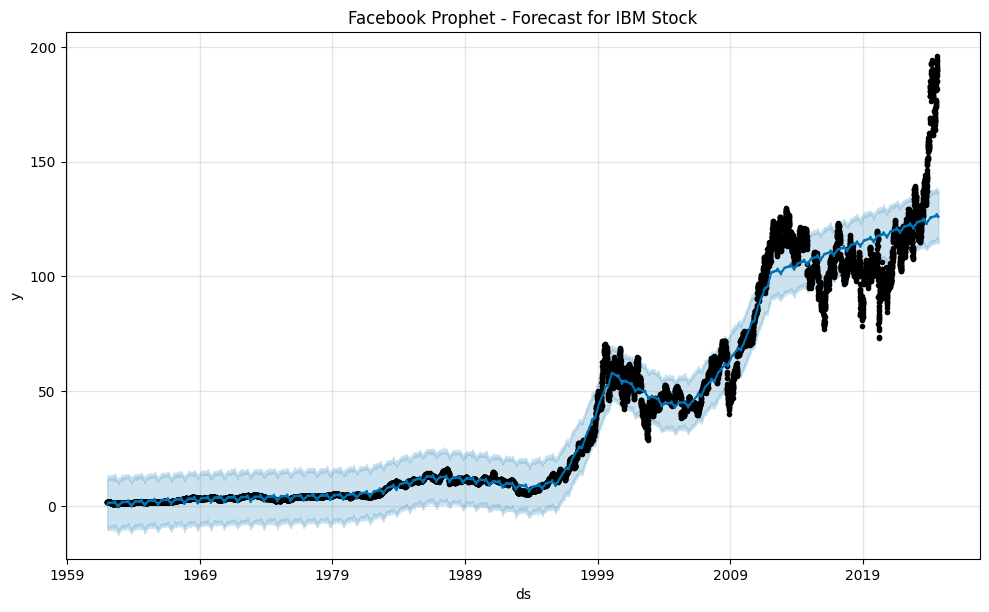

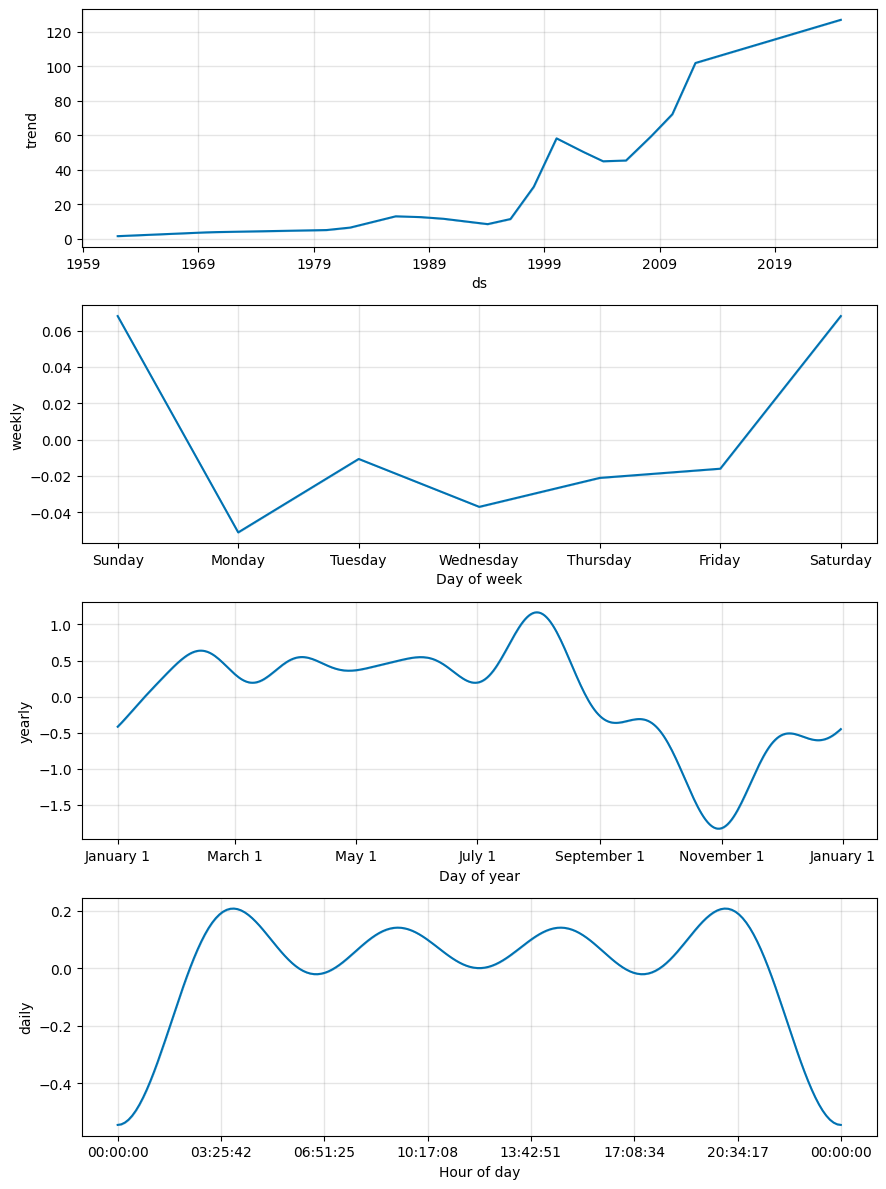

In [6]:
# Install if needed
# !pip install prophet

from prophet import Prophet

# Prophet needs 'ds' and 'y' column names
prophet_df = df['Close'].reset_index()
prophet_df.columns = ['ds', 'y']

# Create model and fit
prophet_model = Prophet(daily_seasonality=True)
prophet_model.fit(prophet_df)

# Make future dataframe for 30 days
future = prophet_model.make_future_dataframe(periods=30)

# Predict
forecast = prophet_model.predict(future)

# Plot
fig1 = prophet_model.plot(forecast)
plt.title("Facebook Prophet - Forecast for IBM Stock")
plt.show()

# Plot components: Trend, Seasonality
fig2 = prophet_model.plot_components(forecast)
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

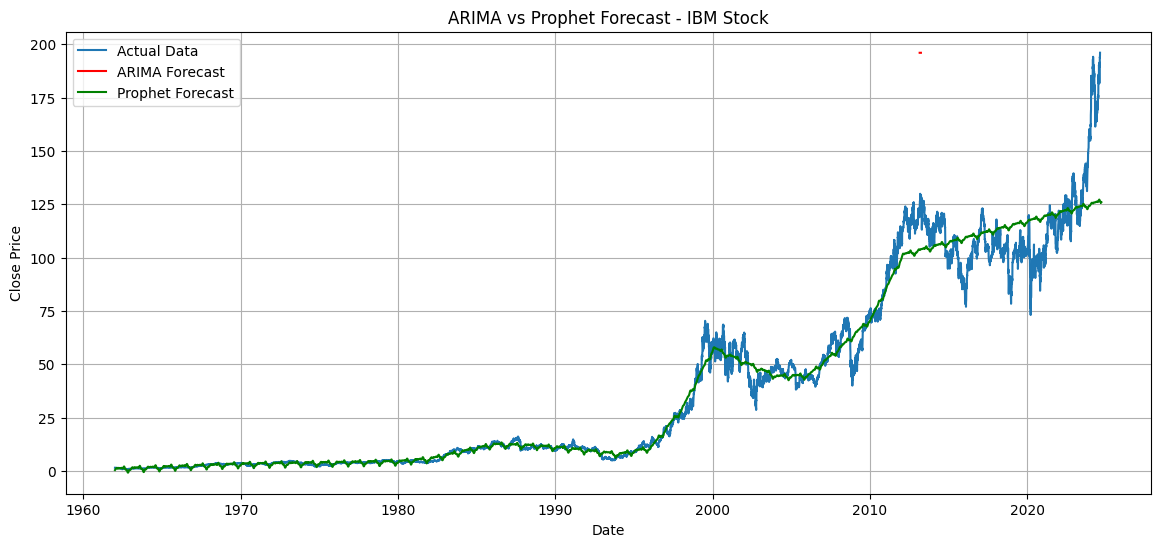

In [9]:
# Forecast using ARIMA again (30 days)
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(df['Close'], order=(1, 1, 0))
model_arima_fit = model_arima.fit()
arima_forecast = model_arima_fit.forecast(steps=30)

# Forecast using Prophet again
from prophet import Prophet
prophet_df = df['Close'].reset_index()
prophet_df.columns = ['ds', 'y']

prophet_model = Prophet(daily_seasonality=True)
prophet_model.fit(prophet_df)
future = prophet_model.make_future_dataframe(periods=30)
prophet_forecast = prophet_model.predict(future)

# Plot both forecasts
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Actual Data')
plt.plot(arima_forecast.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.plot(prophet_forecast['ds'], prophet_forecast['yhat'], label='Prophet Forecast', color='green')
plt.title("ARIMA vs Prophet Forecast - IBM Stock")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


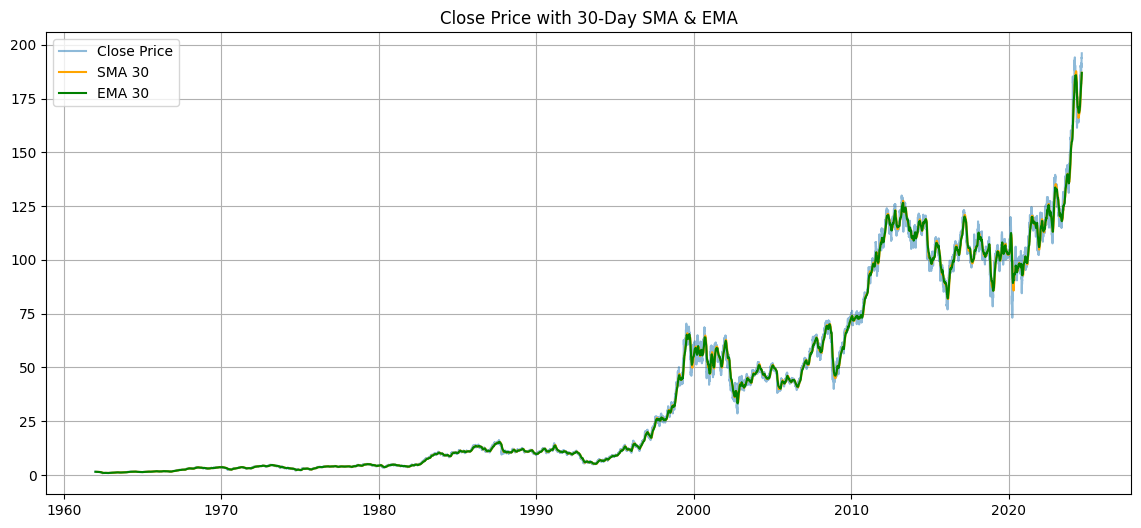

In [10]:
# Simple Moving Average (30-day)
df['SMA_30'] = df['Close'].rolling(window=30).mean()

# Exponential Moving Average (30-day)
df['EMA_30'] = df['Close'].ewm(span=30, adjust=False).mean()

# Plot
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['SMA_30'], label='SMA 30', color='orange')
plt.plot(df['EMA_30'], label='EMA 30', color='green')
plt.title("Close Price with 30-Day SMA & EMA")
plt.legend()
plt.grid(True)
plt.show()


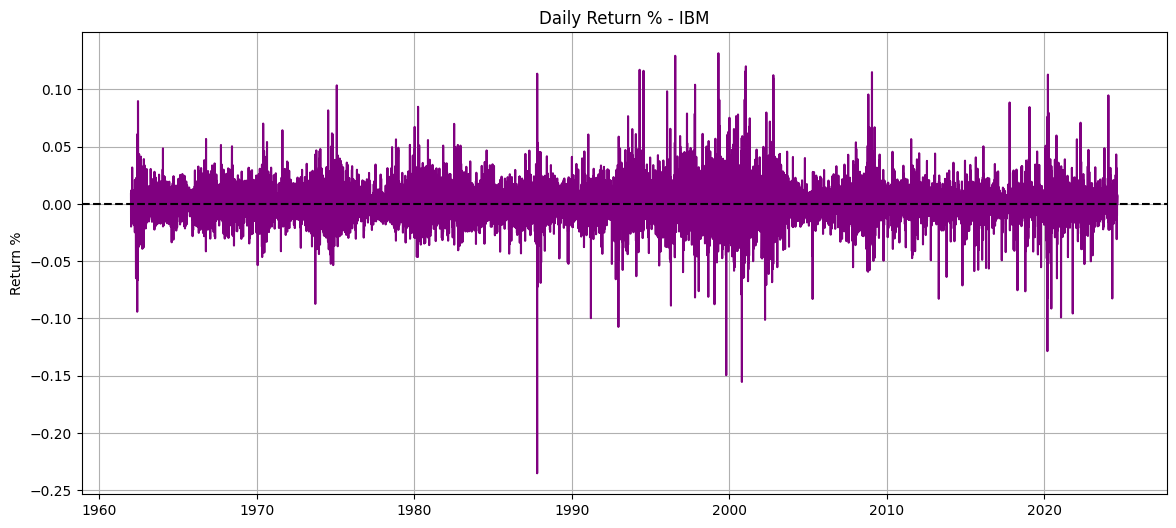

In [11]:
df['Daily_Return'] = df['Close'].pct_change()

plt.figure(figsize=(14,6))
plt.plot(df['Daily_Return'], label='Daily Return', color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.title("Daily Return % - IBM")
plt.ylabel("Return %")
plt.grid(True)
plt.show()


/tmp/ipython-input-12-1482396042.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['Close'].resample('M').mean()


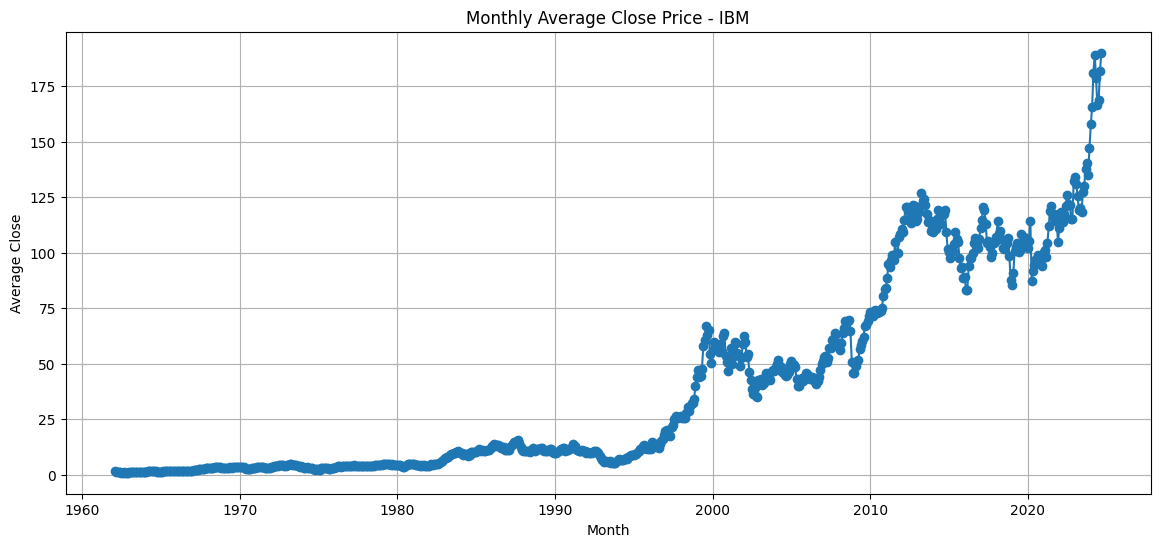

In [12]:
# Group by month
monthly_avg = df['Close'].resample('M').mean()

plt.figure(figsize=(14,6))
plt.plot(monthly_avg, marker='o', linestyle='-')
plt.title("Monthly Average Close Price - IBM")
plt.xlabel("Month")
plt.ylabel("Average Close")
plt.grid(True)
plt.show()


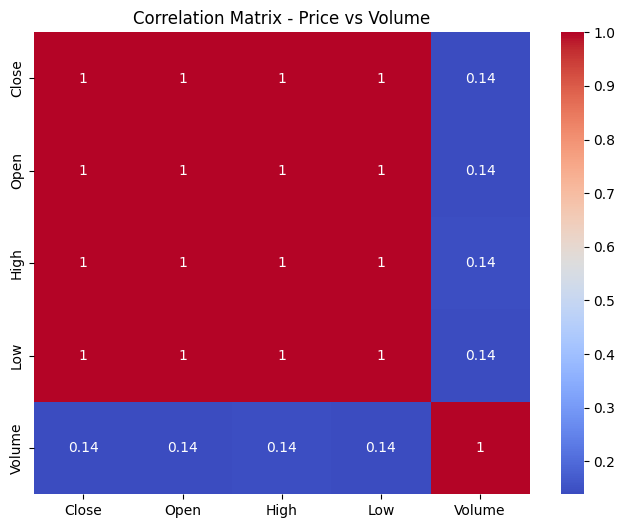

In [13]:
import seaborn as sns

# Compute correlation matrix
corr = df[['Close', 'Open', 'High', 'Low', 'Volume']].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - Price vs Volume")
plt.show()


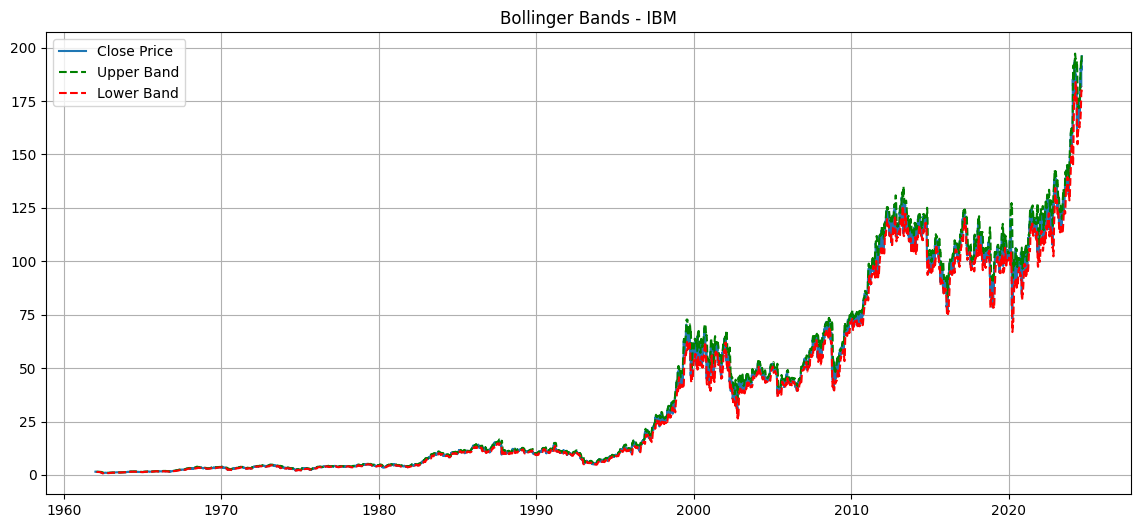

In [14]:
# Calculate rolling mean and std deviation
rolling_mean = df['Close'].rolling(window=20).mean()
rolling_std = df['Close'].rolling(window=20).std()

# Bollinger Bands
df['Upper_Band'] = rolling_mean + (2 * rolling_std)
df['Lower_Band'] = rolling_mean - (2 * rolling_std)

# Plot
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['Upper_Band'], label='Upper Band', linestyle='--', color='green')
plt.plot(df['Lower_Band'], label='Lower Band', linestyle='--', color='red')
plt.title("Bollinger Bands - IBM")
plt.legend()
plt.grid(True)
plt.show()
